In [1]:
# retrieve total ontologies hierarchy from gene ontology
from ujson import load
import os
import numpy as np
import graphviz
from matplotlib import cm
import pandas as pd
with open('../raw_data/goslim_yeast.json', 'r') as inp:
    rawGO = load(inp)

In [2]:
list(rawGO.keys())

['graphs']

In [3]:
rawGoGraphs = rawGO['graphs']

In [4]:
type(rawGoGraphs)

list

In [5]:
len(rawGoGraphs)

1

In [6]:
rawGoGraph = rawGoGraphs[0]
list(rawGoGraph.keys())

['nodes',
 'edges',
 'id',
 'meta',
 'equivalentNodesSets',
 'logicalDefinitionAxioms',
 'domainRangeAxioms',
 'propertyChainAxioms']

In [7]:
type(rawGoGraph['nodes'])

list

In [8]:
len(rawGoGraph['nodes'])

267

In [9]:
type(rawGoGraph['edges'])

list

In [10]:
len(rawGoGraph['edges'])

260

In [11]:
rawGoGraph['id']

'http://purl.obolibrary.org/obo/go/subsets/goslim_yeast.owl'

In [12]:
firstNode = rawGoGraph['nodes'][0]

In [13]:
list(firstNode.keys())

['id', 'meta', 'type', 'lbl']

In [14]:
firstNode

{'id': 'http://purl.obolibrary.org/obo/GO_0003677',
 'meta': {'definition': {'val': 'Any molecular function by which a gene product interacts selectively and non-covalently with DNA (deoxyribonucleic acid).',
   'xrefs': ['GOC:dph', 'GOC:jl', 'GOC:tb', 'GOC:vw']},
  'subsets': ['http://purl.obolibrary.org/obo/go#goslim_aspergillus',
   'http://purl.obolibrary.org/obo/go#goslim_mouse',
   'http://purl.obolibrary.org/obo/go#goslim_generic',
   'http://purl.obolibrary.org/obo/go#goslim_plant',
   'http://purl.obolibrary.org/obo/go#goslim_candida',
   'http://purl.obolibrary.org/obo/go#goslim_drosophila',
   'http://purl.obolibrary.org/obo/go#goslim_agr',
   'http://purl.obolibrary.org/obo/go#goslim_flybase_ribbon',
   'http://purl.obolibrary.org/obo/go#goslim_chembl',
   'http://purl.obolibrary.org/obo/go#goslim_yeast'],
  'synonyms': [{'pred': 'hasRelatedSynonym',
    'val': 'structure-specific DNA binding',
    'xrefs': []},
   {'pred': 'hasRelatedSynonym',
    'val': 'structure specifi

In [15]:
firstEdge = rawGoGraph['edges'][0]

In [16]:
list(firstEdge.keys())

['sub', 'pred', 'obj']

In [17]:
firstEdge

{'sub': 'http://purl.obolibrary.org/obo/GO_0016779',
 'pred': 'is_a',
 'obj': 'http://purl.obolibrary.org/obo/GO_0016740'}

In [18]:
set([x['pred'] for x in rawGoGraph['edges']])

{'http://purl.obolibrary.org/obo/BFO_0000050',
 'http://purl.obolibrary.org/obo/BFO_0000051',
 'http://purl.obolibrary.org/obo/BFO_0000066',
 'http://purl.obolibrary.org/obo/RO_0002211',
 'http://purl.obolibrary.org/obo/RO_0002212',
 'http://purl.obolibrary.org/obo/RO_0002213',
 'inverseOf',
 'is_a',
 'subPropertyOf'}

In [19]:
rawGoGraph['equivalentNodesSets']

[]

In [20]:
[x for x in rawGoGraph['nodes'] if x['id'] == 'http://purl.obolibrary.org/obo/BFO_0000050']

[{'id': 'http://purl.obolibrary.org/obo/BFO_0000050',
  'meta': {'xrefs': [{'val': 'BFO:0000050'}],
   'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboInOwl#hasOBONamespace',
     'val': 'external'},
    {'pred': 'http://www.geneontology.org/formats/oboInOwl#shorthand',
     'val': 'part_of'}]},
  'type': 'PROPERTY',
  'lbl': 'part of'}]

In [21]:
[x for x in rawGoGraph['nodes'] if x['id'] == 'http://purl.obolibrary.org/obo/BFO_0000051']

[{'id': 'http://purl.obolibrary.org/obo/BFO_0000051',
  'meta': {'xrefs': [{'val': 'BFO:0000051'}],
   'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboInOwl#shorthand',
     'val': 'has_part'},
    {'pred': 'http://www.geneontology.org/formats/oboInOwl#hasOBONamespace',
     'val': 'external'}]},
  'type': 'PROPERTY',
  'lbl': 'has part'}]

In [22]:
[x['type']  if 'type' in x else x for x in rawGoGraph['nodes']]

['CLASS',
 'CLASS',
 'CLASS',
 'CLASS',
 'CLASS',
 'CLASS',
 {'id': 'http://purl.obolibrary.org/obo/RO_0002297',
  'meta': {'xrefs': [{'val': 'RO:0002297'}],
   'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboInOwl#hasOBONamespace',
     'val': 'external'},
    {'pred': 'http://www.geneontology.org/formats/oboInOwl#shorthand',
     'val': 'results_in_formation_of'}]},
  'lbl': 'results in formation of'},
 'CLASS',
 {'id': 'http://purl.obolibrary.org/obo/RO_0002298',
  'meta': {'xrefs': [{'val': 'RO:0002298'}],
   'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboInOwl#hasOBONamespace',
     'val': 'external'},
    {'pred': 'http://www.geneontology.org/formats/oboInOwl#shorthand',
     'val': 'results_in_morphogenesis_of'}]},
  'lbl': 'results in morphogenesis of'},
 {'id': 'http://purl.obolibrary.org/obo/RO_0002299',
  'meta': {'xrefs': [{'val': 'RO:0002299'}],
   'basicPropertyValues': [{'pred': 'http://www.geneontology.org/formats/oboIn

In [23]:
set([x['type'] for x in rawGoGraph['nodes']  if 'type' in x])

{'CLASS', 'PROPERTY'}

In [24]:
goClassNodes = [x for x in rawGoGraph['nodes'] if 'type' in x
           and x['type'] == 'CLASS']
goPropertyNodes = [x for x in rawGoGraph['nodes'] if 'type' in x
           and x['type'] == 'PROPERTY']

In [25]:
goPropertyNodes

[{'id': 'http://www.geneontology.org/formats/oboInOwl#consider',
  'type': 'PROPERTY',
  'lbl': 'consider'},
 {'id': 'http://purl.obolibrary.org/obo/go#syngo_official_label',
  'type': 'PROPERTY',
  'lbl': 'label approved by the SynGO project'},
 {'id': 'http://www.geneontology.org/formats/oboInOwl#hasRelatedSynonym',
  'type': 'PROPERTY',
  'lbl': 'has_related_synonym'},
 {'id': 'http://purl.obolibrary.org/obo/IAO_0100001',
  'type': 'PROPERTY',
  'lbl': 'term replaced by'},
 {'id': 'http://www.geneontology.org/formats/oboInOwl#hasAlternativeId',
  'type': 'PROPERTY',
  'lbl': 'has_alternative_id'},
 {'id': 'http://www.geneontology.org/formats/oboInOwl#hasSynonymType',
  'type': 'PROPERTY',
  'lbl': 'has_synonym_type'},
 {'id': 'http://www.geneontology.org/formats/oboInOwl#SynonymTypeProperty',
  'type': 'PROPERTY',
  'lbl': 'synonym_type_property'},
 {'id': 'http://www.geneontology.org/formats/oboInOwl#shorthand',
  'type': 'PROPERTY',
  'lbl': 'shorthand'},
 {'id': 'http://purl.obol

In [26]:
goPropertyNodesKeyVal = {x['id']:x['lbl'] for x in goPropertyNodes}
goPropertyNodesKeyVal

{'http://www.geneontology.org/formats/oboInOwl#consider': 'consider',
 'http://purl.obolibrary.org/obo/go#syngo_official_label': 'label approved by the SynGO project',
 'http://www.geneontology.org/formats/oboInOwl#hasRelatedSynonym': 'has_related_synonym',
 'http://purl.obolibrary.org/obo/IAO_0100001': 'term replaced by',
 'http://www.geneontology.org/formats/oboInOwl#hasAlternativeId': 'has_alternative_id',
 'http://www.geneontology.org/formats/oboInOwl#hasSynonymType': 'has_synonym_type',
 'http://www.geneontology.org/formats/oboInOwl#SynonymTypeProperty': 'synonym_type_property',
 'http://www.geneontology.org/formats/oboInOwl#shorthand': 'shorthand',
 'http://purl.obolibrary.org/obo/RO_0002213': 'positively regulates',
 'http://www.geneontology.org/formats/oboInOwl#hasScope': 'has_scope',
 'http://purl.obolibrary.org/obo/RO_0002211': 'regulates',
 'http://purl.obolibrary.org/obo/RO_0002212': 'negatively regulates',
 'http://purl.obolibrary.org/obo/BFO_0000050': 'part of',
 'http://

In [27]:
for edge in rawGoGraph['edges']:
    edge['pred'] = goPropertyNodesKeyVal.get(edge['pred'], edge['pred'])

In [28]:
preds = list(set([x['pred'] for x in rawGoGraph['edges']]))
preds

['positively regulates',
 'occurs in',
 'subPropertyOf',
 'is_a',
 'negatively regulates',
 'inverseOf',
 'regulates',
 'has part',
 'part of']

In [45]:
from IPython.display import Markdown
Markdown('\n\n'.join([f"[{x['lbl']}]({x['id']})" for x in rawGoGraph['nodes'] if x['lbl'] in preds]))

[positively regulates](http://purl.obolibrary.org/obo/RO_0002213)

[regulates](http://purl.obolibrary.org/obo/RO_0002211)

[negatively regulates](http://purl.obolibrary.org/obo/RO_0002212)

[part of](http://purl.obolibrary.org/obo/BFO_0000050)

[has part](http://purl.obolibrary.org/obo/BFO_0000051)

[occurs in](http://purl.obolibrary.org/obo/BFO_0000066)

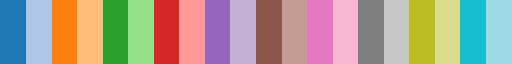

In [29]:
edgeCMap = cm.get_cmap('tab20')
edgeCMap

In [30]:
freqs = {k['id']:[k['lbl'], 0] for k in goClassNodes}
for edge in rawGoGraph['edges']:
    
    if edge['obj'] in freqs:
        freqs[edge['obj']][1] += 1
    if edge['sub'] in freqs:
        freqs[edge['sub']][1] += 1

In [31]:
freqs

{'http://purl.obolibrary.org/obo/GO_0003677': ['DNA binding', 2],
 'http://purl.obolibrary.org/obo/GO_0005737': ['cytoplasm', 9],
 'http://purl.obolibrary.org/obo/GO_0005856': ['cytoskeleton', 3],
 'http://purl.obolibrary.org/obo/GO_0003674': ['molecular_function', 27],
 'http://purl.obolibrary.org/obo/GO_0005975': ['carbohydrate metabolic process',
  2],
 'http://purl.obolibrary.org/obo/GO_0005730': ['nucleolus', 2],
 'http://purl.obolibrary.org/obo/GO_0007114': ['cell budding', 1],
 'http://purl.obolibrary.org/obo/GO_0006383': ['transcription by RNA polymerase III',
  2],
 'http://purl.obolibrary.org/obo/GO_0016740': ['transferase activity', 5],
 'http://purl.obolibrary.org/obo/GO_0005618': ['cell wall', 2],
 'http://purl.obolibrary.org/obo/GO_0005739': ['mitochondrion', 5],
 'http://purl.obolibrary.org/obo/GO_0000054': ['ribosomal subunit export from nucleus',
  1],
 'http://purl.obolibrary.org/obo/GO_0032787': ['monocarboxylic acid metabolic process',
  1],
 'http://purl.obolibrary

In [32]:

freqsDf = pd.DataFrame((list(freqs.values())), columns=['name','counts'], index=list(freqs.keys()))

In [33]:
freqsDf = freqsDf.sort_values('counts')
freqsDf

,name,counts
http://purl.obolibrary.org/obo/GO_0032200,telomere organization,1
http://purl.obolibrary.org/obo/GO_0006470,protein dephosphorylation,1
http://purl.obolibrary.org/obo/GO_0007033,vacuole organization,1
http://purl.obolibrary.org/obo/GO_0007031,peroxisome organization,1
http://purl.obolibrary.org/obo/GO_0009451,RNA modification,1
...,...,...
http://purl.obolibrary.org/obo/GO_0016020,membrane,8
http://purl.obolibrary.org/obo/GO_0005737,cytoplasm,9
http://purl.obolibrary.org/obo/GO_0003674,molecular_function,27
http://purl.obolibrary.org/obo/GO_0005575,cellular_component,30


In [34]:
families = freqsDf.iloc[-3:].index.tolist()
familiesNames = freqsDf.iloc[-3:]['name'].tolist()

In [35]:
def getConnectedEdges(nodeId, edges, ret):
    for edge in edges:
        if edge['obj'] == nodeId:
            if not any((edge['sub']==x['sub']) and 
                       (edge['obj']==x['obj']) and 
                       (edge['pred']==x['pred']) for x in ret):
                ret.append(edge)
            getConnectedEdges(edge['sub'], edges, ret)
    
splitEdges = {}
for f,name in zip(families, familiesNames):
    splitEdges[name] = []
    getConnectedEdges(f, rawGoGraph['edges'], splitEdges[name])

In [36]:




colorStr = lambda r,g,b : '#%02x%02x%02x' % (r, g, b)


for cnt,f in enumerate(splitEdges):
    fname = f'../figures/{f}_go_terms_tree'
    dot = graphviz.Digraph(f'{f} sc go terms', filename=fname,
                       node_attr={'color': 'lightblue2', 'style': 'filled',
                                         'height': '.1'},
                       engine='dot')
    for node in goClassNodes:
        if any((node['id']==x['sub']) or (node['id']==x['obj']) for x in splitEdges[f]):
            dot.node(node['id'].split('/')[-1], node['lbl'])
    dot.attr(size='20,20')
    dot.attr(ranksep='1.5')
    dot.attr(overlap='false', splines='true')
    with dot.subgraph(name=f'cluster{cnt}') as c:

        
        for cnt, edge in enumerate(splitEdges[f]):
            
            if edge['obj'] in freqs:
                color = colorStr(*np.int0(np.array(edgeCMap(preds.index(edge['pred']))[:3]) * 255))
                c.edge(edge['sub'].split('/')[-1], edge['obj'].split('/')[-1], label=edge['pred'],
                        color=color , fontcolor=color )
        c.attr(style='filled', color='lightgrey')
        c.node_attr.update(style='filled', color='white')
        c.attr(label=f)
    dot.render(view=False)

    os.remove(fname)